# First, import the necessary libraries and read in the CSV

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype, is_string_dtype

In [2]:
df = pd.read_csv('aus_rain.csv')

# Now we'll begin EDA

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235
std,6.388924,7.109554,8.423217,13.138385,8.851082,8.721551,18.932077,20.532065,6.746248,6.681788,6.472166,6.870771
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000
50%,12.000000,22.700000,0.000000,39.000000,13.000000,18.637576,70.000000,51.482606,1017.653758,1015.258204,16.800000,21.300000
75%,16.800000,28.200000,0.800000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.300000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


Start off by making some histograms and bar charts to understand our data

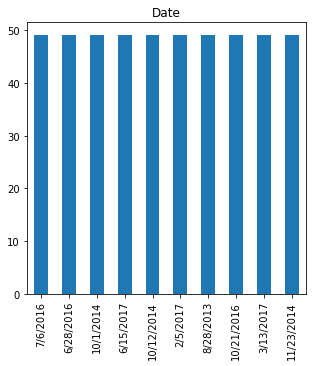

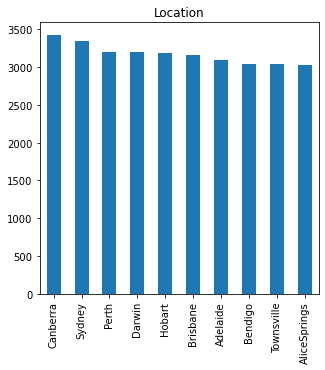

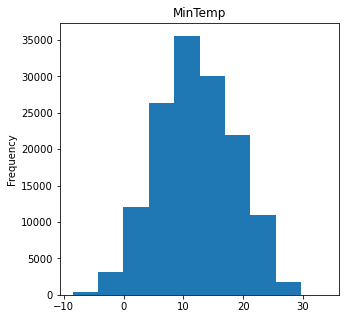

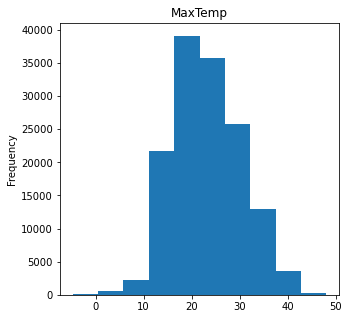

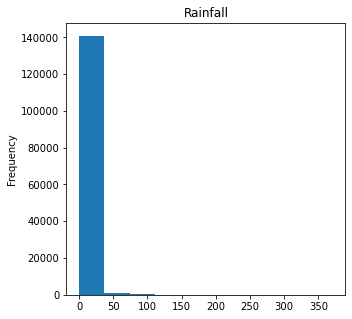

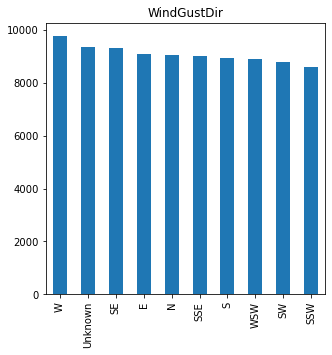

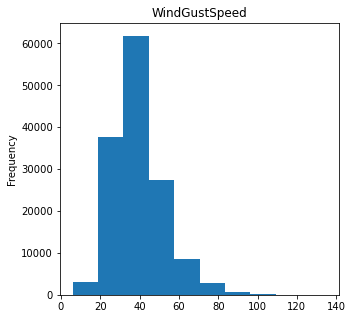

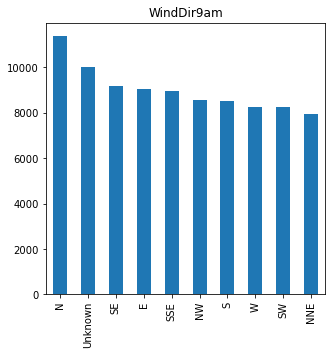

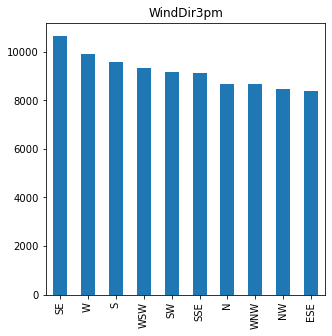

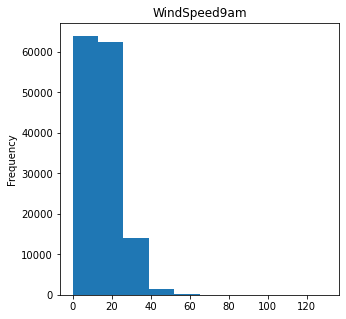

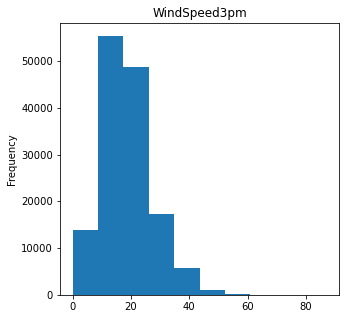

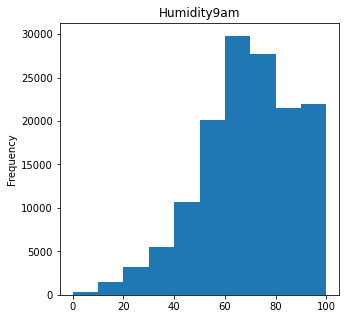

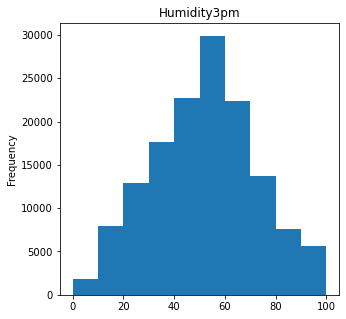

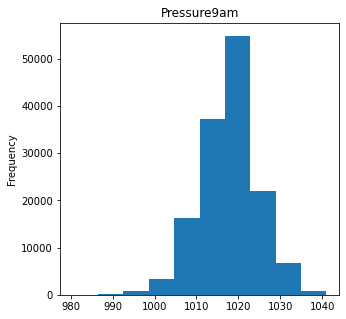

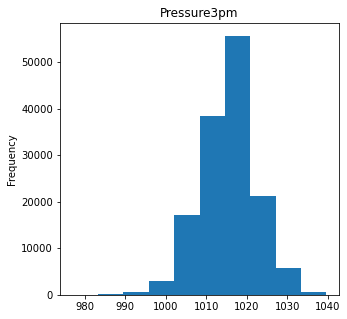

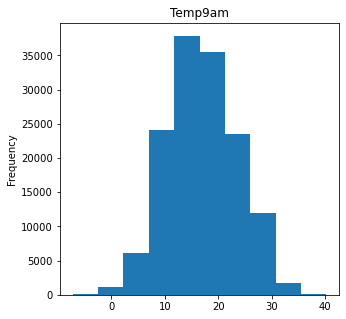

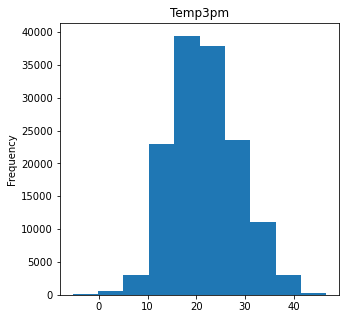

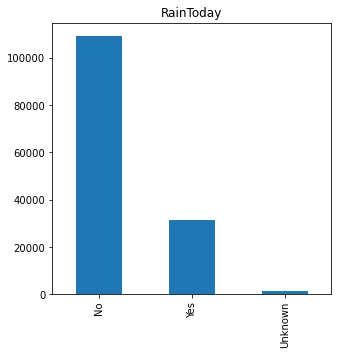

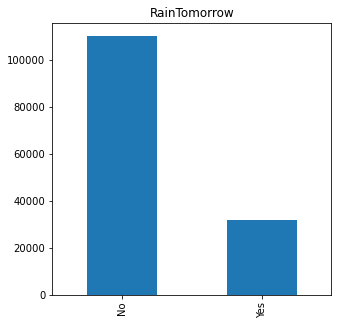

In [5]:
for column in df:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
    elif is_string_dtype(df[column]):
        df[column].value_counts()[:10].plot(kind = 'bar')

There's a large skew in the Rainfall histogram, so there must be an outlier or outliers.

<AxesSubplot:title={'center':'Rainfall'}, ylabel='Frequency'>

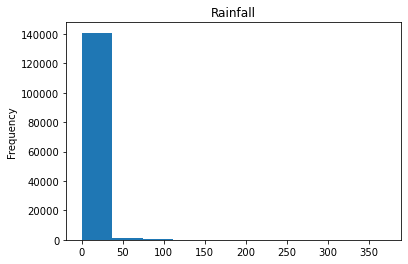

In [6]:
plt.title('Rainfall')
df['Rainfall'].plot(kind = 'hist')

We will remove the outlies by limiting the dataset to only the 90% quantile of the data.

(127798, 19)

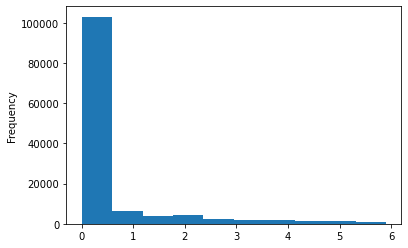

In [7]:
df = df[df['Rainfall'] < df['Rainfall'].quantile(.9)]
df['Rainfall'].plot(kind = 'hist')
df.shape

This worked nicely because now the Rainfall values range from 0 to 6 instead of 0 to 350. We can see that the number of rows in the dataset reduced from 142193 to 127798 as well.

We will now remove the outliers, conduct feature engineering, and encode categorical variables in our data_preprocessing.py file.

# After the above changes, we load the new dataset into the notebook

In [8]:
edf = pd.read_csv('aus_rain_EDA_enc.csv')

In [9]:
edf.head()

,Date,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,3,2,13.4,22.9,0.6,14,44.0,14,15,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,12/2/2008,3,2,7.4,25.1,0.0,15,44.0,6,16,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12/3/2008,3,2,12.9,25.7,0.0,16,46.0,14,16,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,12/4/2008,3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,12/5/2008,3,2,17.5,32.3,1.0,14,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


This is a nice visual of which months have the most amounts of rain.

<AxesSubplot:title={'center':'Month'}>

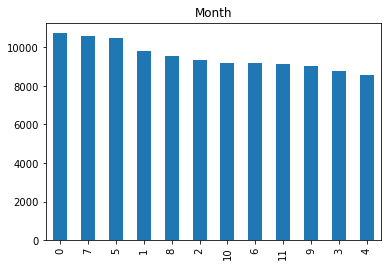

In [12]:
edf['Month'].value_counts().plot(kind = 'bar', title = 'Month')   # shows us which months have the highest chance of rain

We built a heatmap to make correlations visually clear.

<AxesSubplot:>

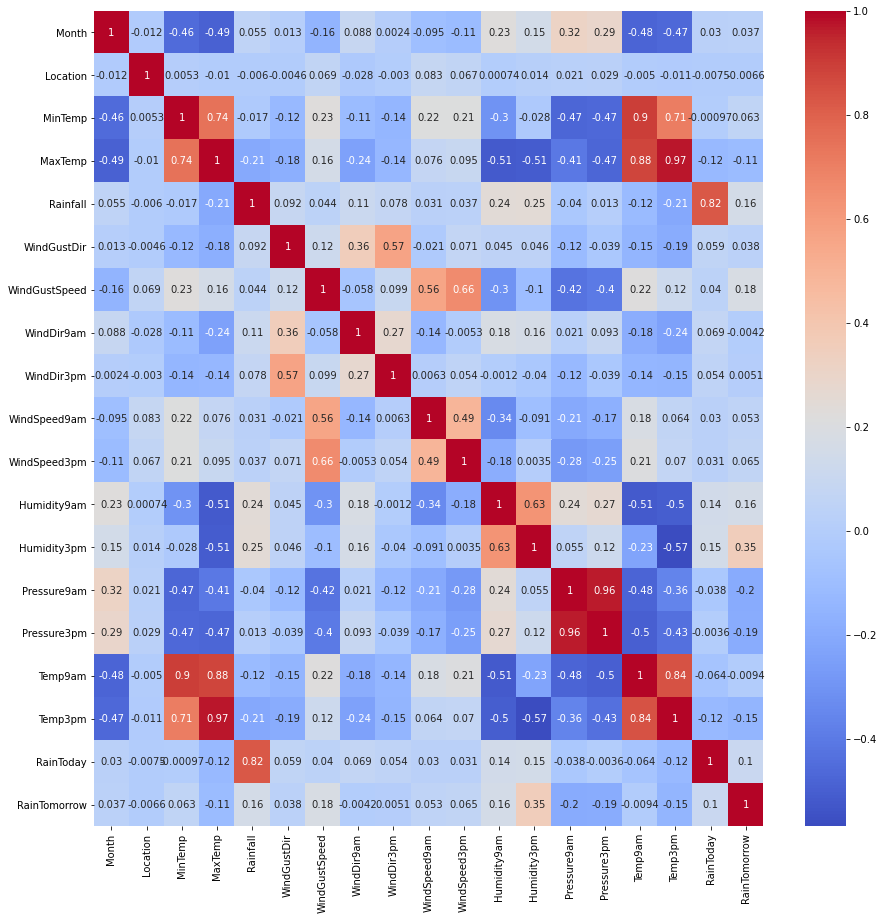

In [15]:
plt.figure(1, figsize = (15,15))
sns.heatmap(edf.corr(), cmap='coolwarm', annot = True)

This concludes the EDA portion of the project.